In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report ,confusion_matrix
from tensorflow.keras import models,layers,datasets
import cv2
import os
from tensorflow import keras
import PIL

In [2]:
data_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos',origin=data_url,cache_dir="/content/drive/MyDrive/Colab Notebooks",untar=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [3]:
data_dir[:

'/tmp/'

In [4]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('/tmp/.keras/datasets/flower_photos')

In [ ]:
count=len(list(data_dir.glob("**/*.jpg")))
count

3670

In [ ]:
roses=list(data_dir.glob("roses/*"))
roses[:5]

[PosixPath('/tmp/.keras/datasets/flower_photos/roses/3052753519_d087aaeacb_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/2225411981_6638c3e988.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/5088766459_f81f50e57d_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/9404876600_04f6d37685.jpg')]

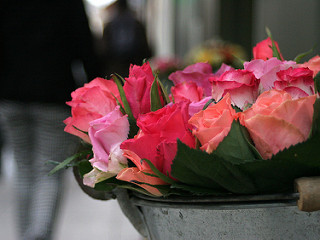

In [ ]:
PIL.Image.open(roses[0])

In [ ]:
flower_image_dict={
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*'))
}

In [ ]:
flowers_label={
    "roses":0,
    "daisy":1,
    "dandelion":2,
    "sunflowers":3,
    "tulips":4
}

In [ ]:
img=cv2.imread((flower_image_dict["roses"])[0])
img.shape

(240, 320, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
x=[]
y=[]  # takes long time in cpu
for fn,im in flower_image_dict.items():
  for i in im:
    img=cv2.imread(str(i))
    re_img=cv2.resize(img,(180,180))
    x.append(re_img)
    y.append(flowers_label[fn])

In [ ]:
for fn,im in flower_image_dict.items():
  print(fn)
  print(len(im))

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [ ]:
x=np.array(x)
y=np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,random_state=0)

In [ ]:
x_train_s=x_train/255
x_test_s=x_test/255

In [ ]:
model=models.Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
      layers.Dense(128,activation='relu'),
      layers.Dense(5),
])

model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

model.fit(x_train_s,y_train,epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.2734 - loss: 1.6270
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5531 - loss: 1.1055
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6466 - loss: 0.9414
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6864 - loss: 0.8239
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7846 - loss: 0.6071
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8316 - loss: 0.4734
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8922 - loss: 0.3063
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9520 - loss: 0.1511
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9789 - loss: 0.0716
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9913 - loss: 0.0407
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9925 - loss: 0.0423
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy:

In [ ]:
model.evaluate(x_test_s,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6315 - loss: 3.1988


[3.211939811706543, 0.6285402774810791]

In [ ]:
y_pred=model.predict(x_test_s)
y_pred

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


array([[  6.2928023 ,   9.910166  ,   0.7069388 , -11.099671  ,
          1.029272  ],
       [ 29.044167  , -17.139057  , -22.63998   ,  -5.0456815 ,
         42.62113   ],
       [ -1.766645  , -16.335999  ,   6.806194  ,  10.1091585 ,
          2.6973193 ],
       ...,
       [ -9.878659  ,  -7.24976   ,   2.4620132 ,  12.1631365 ,
          4.3829093 ],
       [ 14.65338   ,  -6.5980024 , -14.3453045 ,  -2.1687257 ,
         10.449441  ],
       [ -0.76201373, -16.504148  ,   9.830828  ,   6.308809  ,
          3.9551504 ]], dtype=float32)

In [ ]:
score=tf.nn.softmax(y_pred[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([2.6145034e-02, 9.7362161e-01, 9.8057193e-05, 7.3102707e-10,
       1.3535275e-04], dtype=float32)>

In [ ]:
np.argmax(score),y_test[0] # it is predicting correct but the accuracy is low this is due to overfitting let perform data
#argumentation

(1, 1)

In [ ]:
d_aug=keras.Sequential([
    layers.RandomFlip("horizontal",input_shape=(180,180,3)),
    layers.RandomRotation(.1),
    layers.RandomZoom(.1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


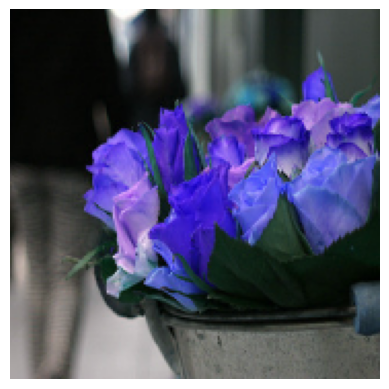

In [ ]:
plt.axis("off")
plt.imshow(x[0])

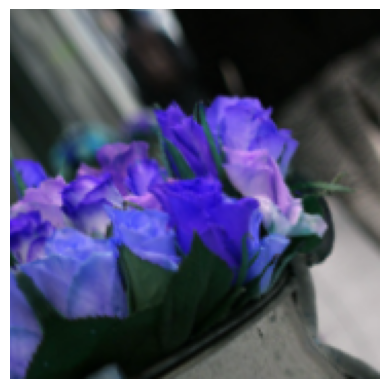

In [ ]:
plt.axis("off")
plt.imshow(d_aug(x)[0].numpy().astype("uint8"))

In [ ]:
model=models.Sequential([
    d_aug,
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
      layers.Dense(128,activation='relu'),
      layers.Dense(5),
])

model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

model.fit(x_train_s,y_train,epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.3811 - loss: 1.5258
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5684 - loss: 1.0487
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.6214 - loss: 0.9543
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.6747 - loss: 0.8620
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.6907 - loss: 0.7903
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.6956 - loss: 0.7822
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.7010 - loss: 0.7740
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7195 - loss: 0.7373
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.7385 - loss: 0.6824
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.7688 - loss: 0.6252
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7525 - loss: 0.6536
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy:

In [ ]:
model.evaluate(x_test_s,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7290 - loss: 0.8691


[0.8873983025550842, 0.7222222089767456]

In [ ]:
# we have improved the model by data augumentation